## Assignment 1

# The relationship between solar radio flux F10.7 and sunspot number

**Starodumova P., Antonov A., Babaev N., Krivova V. | Skoltech EDP course by Tatiana Podladchikova, 2020**

**The objective of  Assignment 1 is to understand the relationship between main indicators of solar activity, sunspot number and the solar radio flux at 10.7 cm (2800 MHz), by applying multi-dimensional linear regression technique.**

In [18]:
# Import libraries required for analysis and processing of data (pandas), 
# operation with multi-dimensional arrays and matrixes (numpy) and data visualization (matplotlib)
# Import functions from directories required for the calculation of Pearsons coefficient (pearsonr),
# and square root (sqrt)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import sqrt
import datetime as dt

In [19]:
# Read data separated by whitespace from a text file (column labels are not specified in the file)

df = pd.read_csv('data_group1.txt', header=None, delim_whitespace=True)

In [20]:
# Set column names to data frame

df.columns = ['Year', 'Month', 'Monthly solar radio flux at 10.7 cm, sfu', 'Monthly sunspot number']

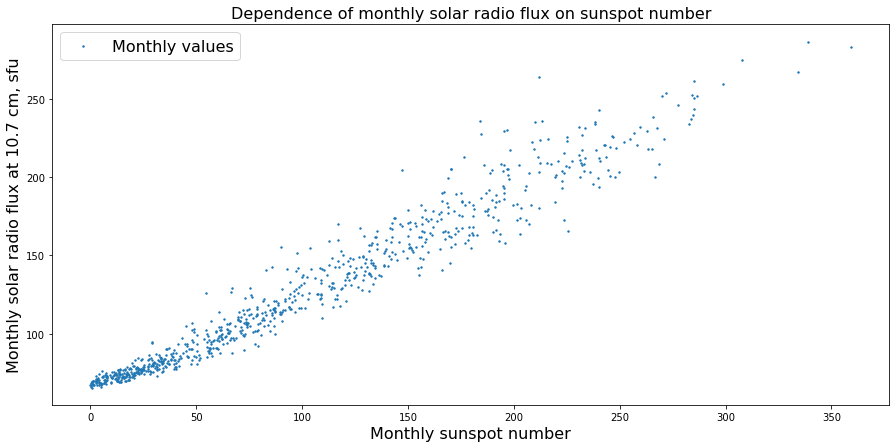

In [40]:
# Plot the dependence of monthly solar radio flux at 10.7 cm on monthly sunspot number

df.plot.scatter(x='Monthly sunspot number',
                y='Monthly solar radio flux at 10.7 cm, sfu',
                s = 2,
                figsize=(15, 7))
plt.xlabel('Monthly sunspot number', fontsize=16)
plt.ylabel('Monthly solar radio flux at 10.7 cm, sfu', fontsize=16)
plt.title('Dependence of monthly solar radio flux on sunspot number', fontsize = 16);
plt.legend(['Monthly values'], fontsize = 16);

**The relationship between the parameters is observed, their covariance is positive.**

In [22]:
# Create an array of dates for x-axis

df['Date'] = df.Year.astype(str).str.cat(df.Month.astype(str), sep='/')
x = [dt.datetime.strptime(d,'%Y/%m').date() for d in df['Date']]

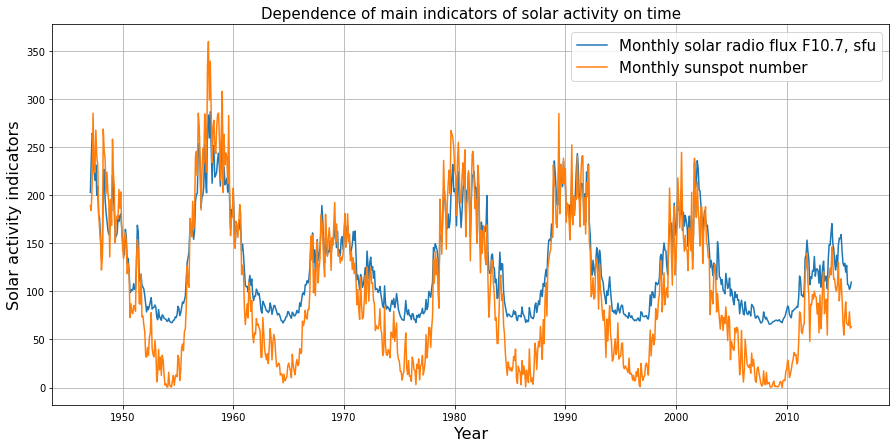

In [41]:
# Plot the dependence of main indicators of solar activity on time 

plt.figure(figsize=(15, 7))
plt.plot(x, df['Monthly solar radio flux at 10.7 cm, sfu'])
plt.plot(x, df['Monthly sunspot number'])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Solar activity indicators', fontsize = 16)
plt.legend(['Monthly solar radio flux F10.7, sfu', 'Monthly sunspot number'], fontsize = 15)
plt.title('Dependence of main indicators of solar activity on time', fontsize = 15)
plt.grid()

**The dependence of sunspot number on time represents so-called "solar cycle" — nearly periodic 11-year change in the Sun's activity. It can be seen from the graph that the peaks and troughs of solar activity indicators coincide in time.**

In [42]:
# The first and the last six months of data are averaged in order to get the smoothed estimates

sunNum = np.array(df['Monthly sunspot number'])
radioFlux = np.array(df['Monthly solar radio flux at 10.7 cm, sfu'])

smoothSunNum = sunNum.copy()
smoothRadioFlux = radioFlux.copy()

smoothSunNum[0:6] = sunNum[0:6].mean()
smoothRadioFlux[0:6] = radioFlux[0:6].mean()

smoothSunNum[-6:] = sunNum[-6:].mean()
smoothRadioFlux[-6:] = radioFlux[-6:].mean()

In [43]:
# Define the function to calculate 13-month running mean

def runMean(arr):
    cur_arr = arr.copy()
    for i in range(6, len(arr)-6):
        cur_arr[i] = arr[(i-5):(i+6)].sum() / 12 + (arr[i-6]+arr[i+6]) / 24
    return cur_arr    

In [44]:
# Calculate 13-month running mean in order to make smoothing monthly mean data

smoothSunNum = runMean(smoothSunNum)
smoothRadioFlux = runMean(smoothRadioFlux)

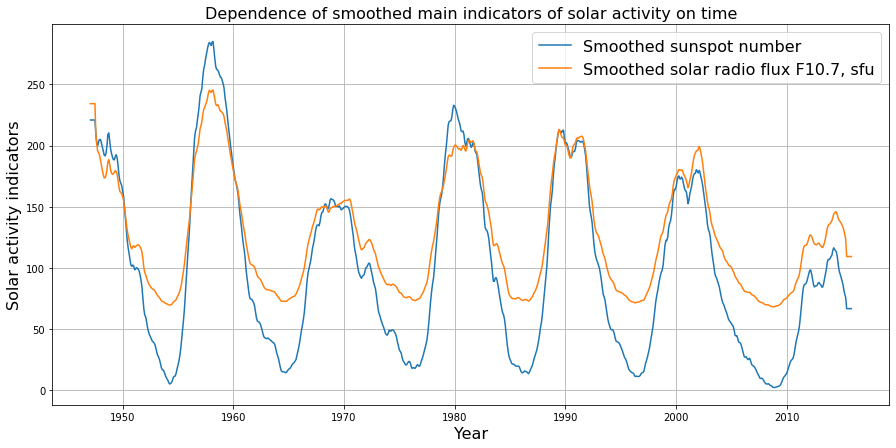

In [49]:
# Plot the dependence of smoothed main indicators of solar activity on time

plt.figure(figsize=(15, 7))
plt.plot(x, smoothSunNum)
plt.plot(x, smoothRadioFlux)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Solar activity indicators', fontsize = 16)
plt.legend(['Smoothed sunspot number', 'Smoothed solar radio flux F10.7, sfu'], fontsize = 16)
plt.title('Dependence of smoothed main indicators of solar activity on time', fontsize = 16)
plt.grid()

**Data smoothing is done in order to remove noise from the graph.**

In [50]:
# In order to estimate the strength of the relationship between two data samples, 
# calculate Pearsons correlation coefficient

corr, _ = pearsonr(smoothSunNum, smoothRadioFlux)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.99


**The value of correlation coefficient is close to 1, the parameters are well correlated. Therefore, we can use linear regression model.**

**Multi-dimensional linear regression is determined as $F = R \beta + \epsilon $**, where F — dependent variables, R — independent variables, $\beta$ (hereinafter referred to as B) — coefficients, $\epsilon$ — random errors

In [51]:
# Construct a vector of dependent variables F, regressand (solar radio flux at 10.7 cm)

F = smoothRadioFlux.copy()
F = F.reshape(-1, 1)

In [52]:
# Construct a matrix of independent variables R, regressors (sunspot number at different time)

R = np.zeros((len(smoothSunNum), 4))
for i in range (0, len(smoothSunNum)):
    R[i] = [1, smoothSunNum[i], smoothSunNum[i] ** 2, smoothSunNum[i] ** 3]

In [53]:
# Construct a vector of coefficients B by LSM

B = np.linalg.inv(R.T @ R) @ R.T @ F;

In [65]:
# Show the array of coefficients B determined by LSM

print(B)

[[ 6.58288243e+01]
 [ 4.60065921e-01]
 [ 1.71361841e-03]
 [-4.04385876e-06]]


**The most important are the coefficients $\beta_0$ and $\beta_1$, while the contribution of $\beta_2$ and $\beta_3$ is less significant due to their small values. Thus, the dependence is almost linear.**

In [55]:
# Reconstruct solar radio flux at 10.7 cm on the basis of sunspot number 

recF = R @ B;

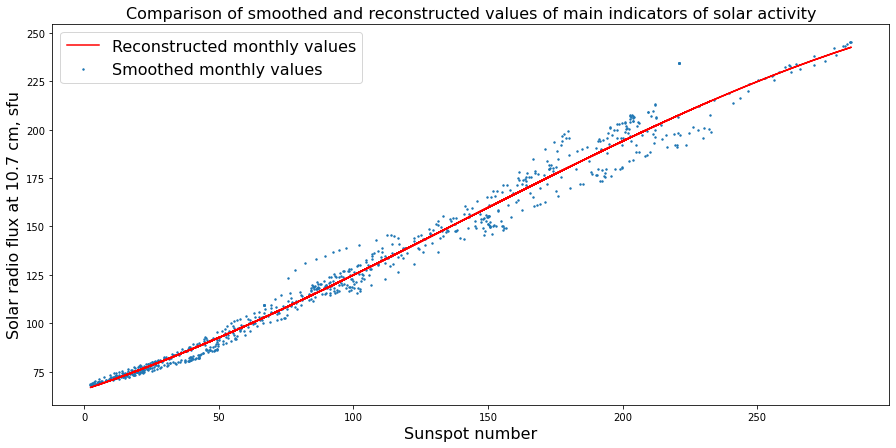

In [59]:
# Plot the dependence of main indicators of solar activity using both smoothed and reconstructed values

plt.figure(figsize=(15, 7));
plt.scatter(smoothSunNum, F, s=2, label='Smoothed monthly values');
plt.plot(smoothSunNum, recF, label='Reconstructed monthly values', color='r');
plt.xlabel('Sunspot number', fontsize = 16);
plt.ylabel('Solar radio flux at 10.7 cm, sfu', fontsize = 16);
plt.legend(fontsize = 16);
plt.title('Comparison of smoothed and reconstructed values of main indicators of solar activity', fontsize = 16);

**It can be seen from the graph that least squares regression line presented by reconstructed monthly values correctly describe the trend of smoothed data.**

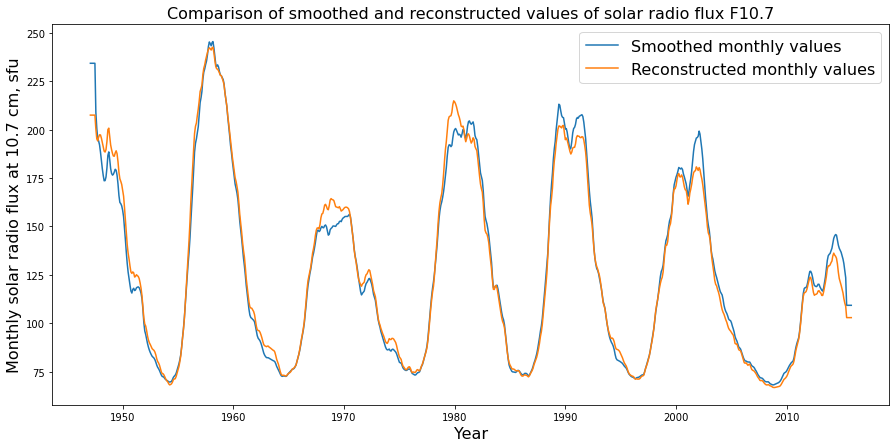

In [60]:
# Plot the dependence of both smoothed and reconstructed values of solar radio flux F10.7 on time 

plt.figure(figsize=(15, 7));
plt.plot(x, F);
plt.plot(x, recF)
plt.xlabel('Year', fontsize = 16);
plt.ylabel('Monthly solar radio flux at 10.7 cm, sfu', fontsize = 16);
plt.legend(['Smoothed monthly values', 'Reconstructed monthly values'], fontsize = 16);
plt.title('Comparison of smoothed and reconstructed values of solar radio flux F10.7', fontsize = 16);

**The values of solar radio flux obtained using multi-dimensional linear regression technique clearly repeat the pattern of smoothed experimental data with several errors regarding peaks which indicates the correct choice of method.**

In [71]:
# Determine the variance of estimation error and the standard deviation of solar radio flux at 10.7 cm

var = ((F - recF) ** 2).sum() / (F.size - 1)
print ('The variance of estimation error equals to %.1f' % var + ';')
print ('The standard deviation equals to %.1f' % sqrt(var) + '.')

The variance of estimation error equals to 38.1;
The standard deviation equals to 6.2.


**The standard deviation is smaller than a range of solar radio flux values which confirms the correctness of the chosen method.**

**Conclusion: Each team member made a valuable personal contribution to the assignment preparation. Despite the fact that for some team members programming in Python was a completely new experience, each of us independently conducted the assignment in order to understand the language syntax and go deeper into theoretical part of the assignment. It resulted in a fruitful zoom discussion of the LSM and multi-dimensional linear regression technique bringing back our bachelor knowledge of linear algebra and probability theory. It was new for all of us to work with real experimental values of solar activity parameters, so we learnt some basics of space weather analysis. We developed more our critical thinking skill when we evaluated reliability of the data obtained, the correctness of method choice and took into account method's limitations. We noted the importance of data visualization when working with large sets of data. Moreover, we found out about a new type of results presentation for us - a learning log. Its stucture seemed quite clear for us before we started writing it - it was a surprise for us that it was actually complicated to express our learnings and insights in such a new way. We still have some problems with it but we hope to improve our skills within the course period because clear thoughts expression is a crucial skill for a scientist. All in all, not always everything worked out the first time, but if necessary, we helped each other or asked a question in the chat.**